# Imports

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import celltypist
import anndata as ad
from scipy import sparse
from anndata import AnnData
import celltypist
import sys  
sys.path.insert(0, '/home/p/pohll/Desktop/Masterpraktikum/masterpraktikum_fibrosis_atlas/source')
#sys.path.append("Desktop/Masterpraktikum/masterpraktikum_fibrosis_atlas/source/utils.py")
import utils

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/

which information should anndatas contain: 
- adata.X --> raw counts
in adata.obs 
- "batch" --> number or name identifying batch/sample
- "author_annotation" --> annotation given by paper
- "manual_celltype_annotation" --> your annotation
- "condition" --> "healthy" or "bleo" or other treatment for fibrosis 
- 'scDblFinder_score' (or other names of doublet ananylsis columns)
- 'scDblFinder_class'

# load data

In [2]:
xie = sc.read("/home/p/pohll/Desktop/MP/data/xie_for_merge.h5ad")
tsukui = sc.read("/home/p/pohll/Desktop/MP/data/tsukui_mini4merge.h5ad")
misharin = sc.read("/home/p/pohll/Desktop/MP/data/misharin_Emma_for_merging.h5ad")

In [3]:
schiller = sc.read("/home/p/pohll/Desktop/MP/data/schiller_whl_for_merge.h5ad")
peyser = sc.read("/home/p/pohll/Desktop/MP/data/Peyser_Merging.h5ad")

## check adatas

In [4]:
print("xie" + str(xie.shape))
print("peyser" + str(peyser.shape))
print("misharin" + str(misharin.shape))
print("tsukui" + str(tsukui.shape))
print("schiller" + str(schiller.shape))

xie(10100, 27998)
peyser(18686, 19472)
misharin(15365, 27998)
tsukui(24881, 18752)
schiller(24071, 23400)


In [5]:
peyser

AnnData object with n_obs × n_vars = 18686 × 19472
    obs: 'batch', 'condition', 'manual_celltype_annotation'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts'

In [4]:
del peyser.var

In [7]:
misharin

AnnData object with n_obs × n_vars = 15365 × 27998
    obs: 'batch', 'author_annotation', 'manual_celltype_annotation', 'condition'

In [8]:
schiller

AnnData object with n_obs × n_vars = 24071 × 23400
    obs: 'author_annotation', 'batch', 'condition', 'timepoint', 'manual_celltype_annotation', 'author_annotation_coarse'

#xie.obs = xie.obs.rename(columns={'scDblFinder_score': 'doublet_score', 'scDblFinder_class': 'predicted_doublet'})

# upset plot of genes --> see R

In [10]:
adatas = {
    "xie": xie,
    "peyser": peyser,
    "tsukui": tsukui,
    "misharin": misharin,
    "schiller": schiller,
 }

In [11]:
gene_sets = {key: list(set(adata.var.index)) for key, adata in adatas.items()}

In [12]:
with open("/home/p/pohll/Desktop/MP/data/dataset_genes.json", "w") as file:
    json.dump(gene_sets, file)

In [1]:
#import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(tidyr)
library(dplyr) 
library(UpSetR)
library(rjson)

R[write to console]: 
Attache Paket: ‘dplyr’


R[write to console]: Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


R[write to console]: Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
%%R
json_data <- fromJSON(file = "/home/p/pohll/Desktop/MP/data/dataset_genes.json")
tiff("dataset_genes_upset.png", units="in", width=4, height=3, res=200)
upset(fromList(json_data), order.by = "freq")
dev.off()

png 
  2 


In [6]:
from IPython.display import Image, display
display(Image(filename='dataset_genes_upset.png'))

# Merge 

In [5]:
adatas = {
    "xie": xie,
    "peyser": peyser,
    "tsukui": tsukui,
    "misharin": misharin,
    "schiller": schiller,
 }
adata = ad.concat(adatas, label="dataset", index_unique="_", join="outer", axis = 0)#.obs

### fix raw counts in anndata 

In [8]:
adata_latest = sc.read("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

In [13]:
print(adata.X)

  (0, 32246)	19.0
  (0, 32252)	1.0
  (0, 32250)	11.0
  (0, 32251)	4.0
  (0, 32249)	1.0
  (0, 32245)	34.0
  (0, 32241)	39.0
  (0, 32242)	2.0
  (0, 32244)	19.0
  (0, 32243)	36.0
  (0, 32248)	14.0
  (0, 32247)	14.0
  (0, 2687)	2.0
  (0, 21597)	1.0
  (0, 6914)	1.0
  (0, 26293)	1.0
  (0, 27036)	1.0
  (0, 26695)	1.0
  (0, 32039)	1.0
  (0, 31605)	1.0
  (0, 25825)	2.0
  (0, 21252)	1.0
  (0, 8155)	1.0
  (0, 18015)	1.0
  (0, 4517)	1.0
  :	:
  (93102, 3301)	1.0
  (93102, 3174)	1.0
  (93102, 3142)	1.0
  (93102, 3117)	1.0
  (93102, 3078)	1.0
  (93102, 3005)	1.0
  (93102, 2922)	3.0
  (93102, 2904)	1.0
  (93102, 2813)	1.0
  (93102, 2809)	1.0
  (93102, 2793)	12.0
  (93102, 2708)	1.0
  (93102, 2693)	1.0
  (93102, 2681)	1.0
  (93102, 2650)	1.0
  (93102, 2568)	2.0
  (93102, 2496)	1.0
  (93102, 2252)	1.0
  (93102, 1612)	1.0
  (93102, 1346)	1.0
  (93102, 905)	1.0
  (93102, 756)	1.0
  (93102, 73)	1.0
  (93102, 51)	1.0
  (93102, 43)	1.0


In [12]:
adata_latest.layers["raw_counts"]= adata.X

In [15]:
print(adata_latest.layers["raw_counts"])

  (0, 32246)	19.0
  (0, 32252)	1.0
  (0, 32250)	11.0
  (0, 32251)	4.0
  (0, 32249)	1.0
  (0, 32245)	34.0
  (0, 32241)	39.0
  (0, 32242)	2.0
  (0, 32244)	19.0
  (0, 32243)	36.0
  (0, 32248)	14.0
  (0, 32247)	14.0
  (0, 2687)	2.0
  (0, 21597)	1.0
  (0, 6914)	1.0
  (0, 26293)	1.0
  (0, 27036)	1.0
  (0, 26695)	1.0
  (0, 32039)	1.0
  (0, 31605)	1.0
  (0, 25825)	2.0
  (0, 21252)	1.0
  (0, 8155)	1.0
  (0, 18015)	1.0
  (0, 4517)	1.0
  :	:
  (93102, 3301)	1.0
  (93102, 3174)	1.0
  (93102, 3142)	1.0
  (93102, 3117)	1.0
  (93102, 3078)	1.0
  (93102, 3005)	1.0
  (93102, 2922)	3.0
  (93102, 2904)	1.0
  (93102, 2813)	1.0
  (93102, 2809)	1.0
  (93102, 2793)	12.0
  (93102, 2708)	1.0
  (93102, 2693)	1.0
  (93102, 2681)	1.0
  (93102, 2650)	1.0
  (93102, 2568)	2.0
  (93102, 2496)	1.0
  (93102, 2252)	1.0
  (93102, 1612)	1.0
  (93102, 1346)	1.0
  (93102, 905)	1.0
  (93102, 756)	1.0
  (93102, 73)	1.0
  (93102, 51)	1.0
  (93102, 43)	1.0


In [16]:
adata_latest

AnnData object with n_obs × n_vars = 93103 × 32317
    obs: 'author_annotation', 'scDblFinder_score', 'scDblFinder_class', 'manual_celltype_annotation', 'batch', 'condition', 'doublet_score', 'predicted_doublet', 'timepoint', 'author_annotation_coarse', 'dataset', 'fibrotic/control', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'low_hierarchy', 'high_hierarchy', 'harmonized_anno', 'coarse_harmonized_anno', 'low_hierarchy_fine', 'high_hierarchy_fine', 'low_hierarchy_coarse', 'high_hierarchy_coarse'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches

In [17]:
adata_latest.write("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

### harmonize condition names

In [15]:
sorted(adata.obs["condition"].unique())

['Bleo',
 'UT',
 'asbestos',
 'bleo',
 'bleomycin',
 'control',
 'healthy',
 'nintedanib',
 'saline']

In [16]:
adata.obs["condition"] = adata.obs["condition"].replace(["Bleo", "bleo"], "bleomycin")
adata.obs["condition"] = adata.obs["condition"].replace(["UT", "control", "healthy"], "untreated")

### add fibrotic/control column in obs

In [17]:
adata.obs["fibrotic/control"] = adata.obs["condition"].apply(lambda x: "control" if x == "untreated" else "fibrotic")

In [18]:
#adata.obs["batch"] = str(adata.obs["batch"]) + "_" + str(adata.obs["dataset"])
adata.obs["batch"] = adata.obs.apply(lambda row: str(row["batch"]) + "_" + str(row["dataset"]), axis=1)

### make unique batch keys across datasets 

In [19]:
adata.obs["batch"] = adata.obs["batch"].astype("category")

In [20]:
adata.obs

author_annotation  scDblFinder_score scDblFinder_class  \
AAACCTGAGGACATTA-1_xie           Col13a1           0.021293           singlet   
AAACCTGCAGTCGTGC-1_xie    Myofibroblasts           0.000934           singlet   
AAACCTGCATGAAGTA-1_xie   Lipofibroblasts           0.000118           singlet   
AAACCTGTCTCGCATC-1_xie    Myofibroblasts           0.000478           singlet   
AAACGGGTCCTAGAAC-1_xie    Myofibroblasts           0.000669           singlet   
...                                  ...                ...               ...   
29291_schiller            Ciliated cells                NaN               NaN   
29292_schiller                 AT2 cells                NaN               NaN   
29293_schiller            Ciliated cells                NaN               NaN   
29294_schiller                 AT2 cells                NaN               NaN   
29295_schiller             T-lymphocytes                NaN               NaN   

                       manual_celltype_annotation             batch  \
AAACCTGAGGACATTA-1_xie             Myofibroblasts             1_xie   
AAACCTGCAGTCGTGC-1_xie  Peribronchial fibroblasts             1_xie   
AAACCTGCATGAAGTA-1_xie       Alveolar macrophages             1_xie   
AAACCTGTCTCGCATC-1_xie  Peribronchial fibroblasts             1_xie   
AAACGGGTCCTAGAAC-1_xie  Peribronchial fibroblasts             1_xie   
...                                           ...               ...   
29291_schiller                Alveolar fibroblast  muc4657_schiller   
29292_schiller                                AT2  muc4657_schiller   
29293_schiller                Alveolar fibroblast  muc4657_schiller   
29294_schiller                                AT2  muc4657_schiller   
29295_schiller                          undefined  muc4657_schiller   

                        condition  doublet_score predicted_doublet timepoint  \
AAACCTGAGGACATTA-1_xie  untreated            NaN               NaN       NaN   
AAACCTGCAGTCGTGC-1_xie  untreated            NaN               NaN       NaN   
AAACCTGCATGAAGTA-1_xie  untreated            NaN               NaN       NaN   
AAACCTGTCTCGCATC-1_xie  untreated            NaN               NaN       NaN   
AAACGGGTCCTAGAAC-1_xie  untreated            NaN               NaN       NaN   
...                           ...            ...               ...       ...   
29291_schiller          untreated            NaN               NaN       d21   
29292_schiller          untreated            NaN               NaN       d21   
29293_schiller          untreated            NaN               NaN       d21   
29294_schiller          untreated            NaN               NaN       d21   
29295_schiller          untreated            NaN               NaN       d21   

                       author_annotation_coarse   dataset fibrotic/control  
AAACCTGAGGACATTA-1_xie                      NaN       xie          control  
AAACCTGCAGTCGTGC-1_xie                      NaN       xie          control  
AAACCTGCATGAAGTA-1_xie                      NaN       xie          control  
AAACCTGTCTCGCATC-1_xie                      NaN       xie          control  
AAACGGGTCCTAGAAC-1_xie                      NaN       xie          control  
...                                         ...       ...              ...  
29291_schiller                   ciliated_cells  schiller          control  
29292_schiller                   alv_epithelium  schiller          control  
29293_schiller                   ciliated_cells  schiller          control  
29294_schiller                   alv_epithelium  schiller          control  
29295_schiller                          T_cells  schiller          control  

[93103 rows x 12 columns]

### write adata

In [21]:
adata.obs["predicted_doublet"] = adata.obs["predicted_doublet"].astype("category")

In [22]:
adata.write("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")
#dataset = sc.read("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

... storing 'fibrotic/control' as categorical


# QC

## calculate qc metrics 

In [23]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith(("MT-", "mt-"))
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL", "rps", "rpl"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [24]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 93103 × 32317
    obs: 'author_annotation', 'scDblFinder_score', 'scDblFinder_class', 'manual_celltype_annotation', 'batch', 'condition', 'doublet_score', 'predicted_doublet', 'timepoint', 'author_annotation_coarse', 'dataset', 'fibrotic/control', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## QC covariates for all datasets

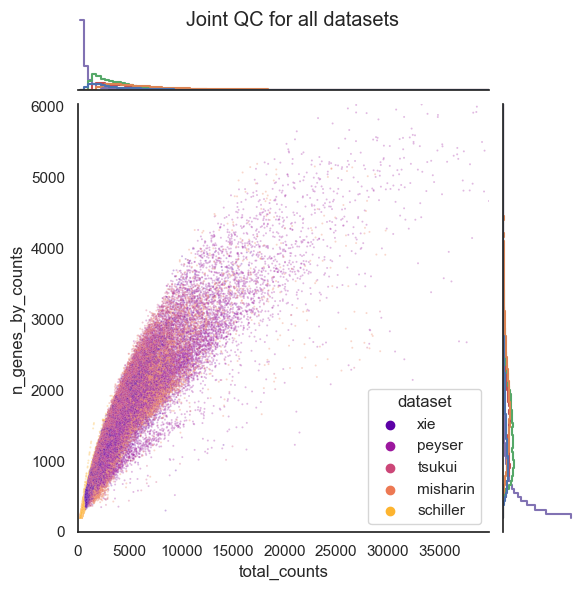

In [26]:
utils.plot_qc_joint(adata, x="total_counts",
                    y='n_genes_by_counts', 
                    hue='dataset', #"dataset",#
                    palette='plasma',
                    marginal_hue="dataset",
                    #x_threshold=(300, 4000), #  total_counts
                    #y_threshold=(0, 17000), # n_genes_by_counts
                    title='Joint QC for all datasets' ) # one for all dataset, colour by dataset 

## QC covariates for Schiller 

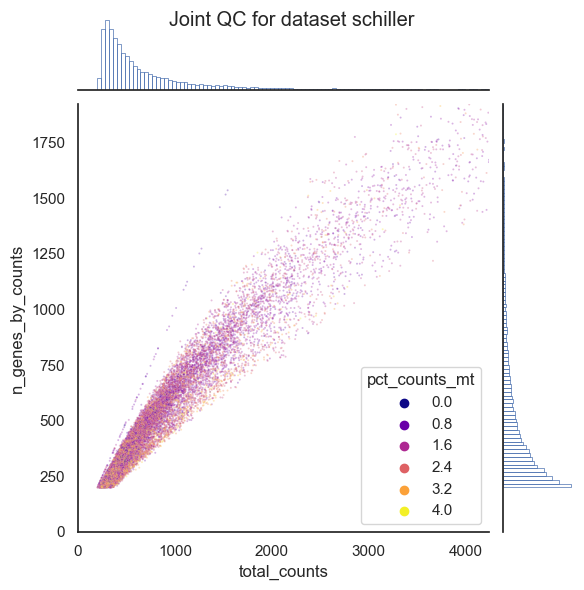

In [25]:
datasets = ["xie", "tsukui","misharin", "peyser", "schiller" ]# todo "schiller"
#for x in datasets: 
subset = adata[adata.obs['dataset'] == "schiller"]
utils.plot_qc_joint(subset, x="total_counts",
                    y='n_genes_by_counts', 
                    hue='pct_counts_mt', 
                   palette='plasma',
                   #marginal_hue="dataset",
                   #x_threshold=(300, 4000), #  total_counts
                  #y_threshold=(0, 17000), # n_genes_by_counts
                  title='Joint QC for dataset schiller') # one for all dataset, colour by dataset 

<AxesSubplot: xlabel='total_counts', ylabel='Count'>

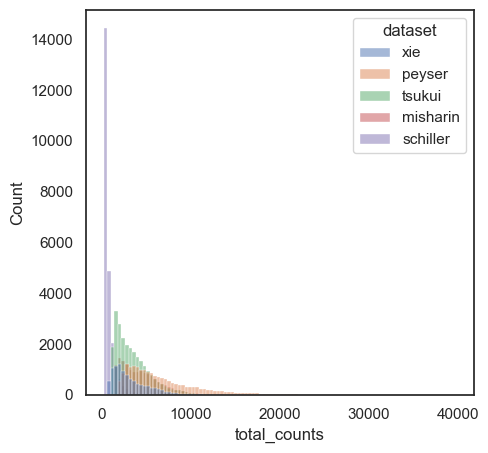

In [61]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.histplot(
    adata.obs, x="total_counts", hue="dataset",bins=100, kde=False, legend = True
)

schiller used other protocol (dropseq), all the others used 10x chromium v2 --> Schiller data has different count distribution, more cells with lower total_counts

# Normalization

In [29]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

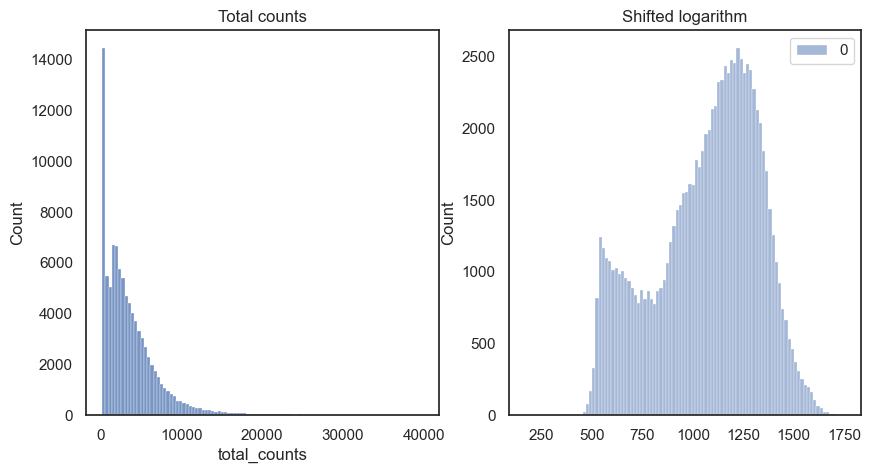

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

left peak due to Schiller data

In [31]:
adata.layers["raw_counts"] = adata.X

In [32]:
adata

AnnData object with n_obs × n_vars = 93103 × 32317
    obs: 'author_annotation', 'scDblFinder_score', 'scDblFinder_class', 'manual_celltype_annotation', 'batch', 'condition', 'doublet_score', 'predicted_doublet', 'timepoint', 'author_annotation_coarse', 'dataset', 'fibrotic/control', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'log1p_norm', 'raw_counts'

# Feature Selection

In [33]:
sc.pp.log1p(adata)

!! use batch_key="dataset" to extract highly_variable_genes

In [34]:
sc.pp.highly_variable_genes(adata, min_mean=0.0120, max_mean=3, min_disp=0.5, batch_key="dataset")

In [35]:
plt.rcParams['figure.figsize'] = (5,5)

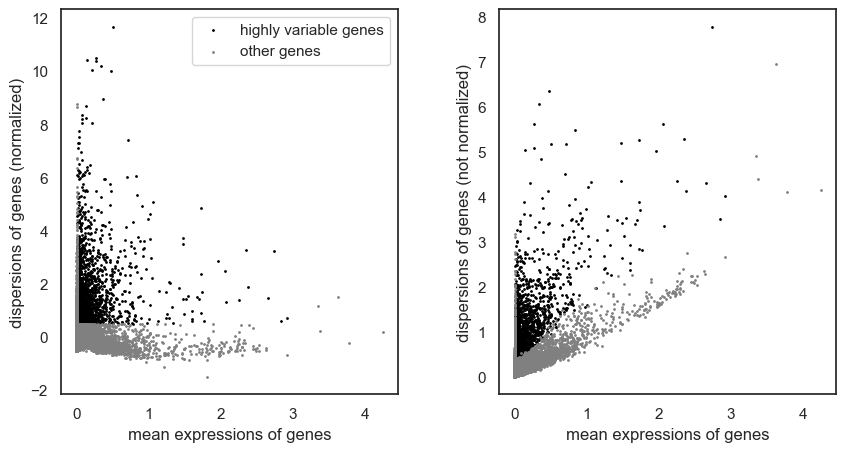

In [36]:
sc.pl.highly_variable_genes(adata)

# Dim Reduction & UMAP 

## PCA

In [37]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True )

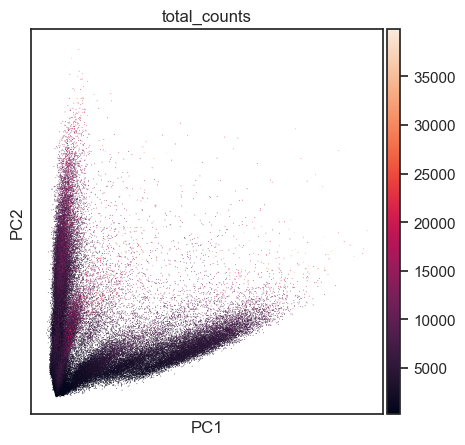

In [38]:
sc.pl.pca(adata, color='total_counts')

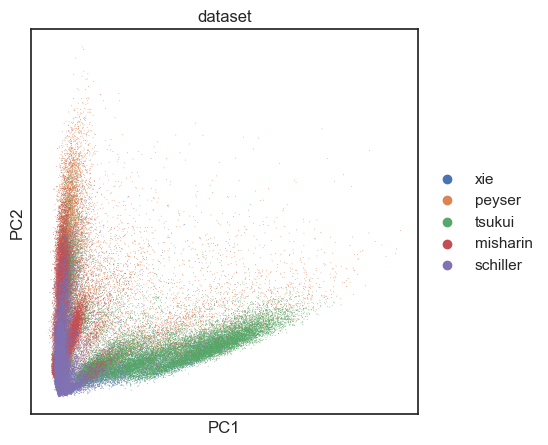

In [39]:
sc.pl.pca(adata, color="dataset")

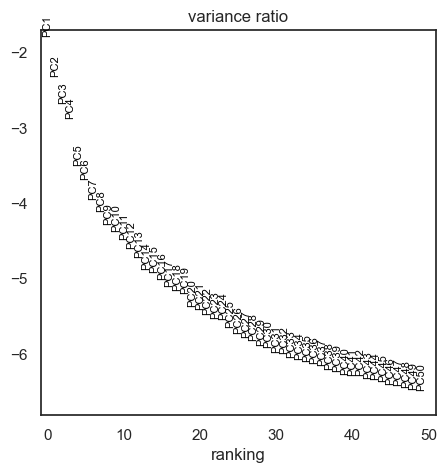

In [42]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50) # später rufe neighbours/UMAP mit verschiedenen PCs auf 

## UMAP (total_count, datasets)

In [43]:
sc.pp.neighbors(adata,n_pcs = 40) 
sc.tl.umap(adata)

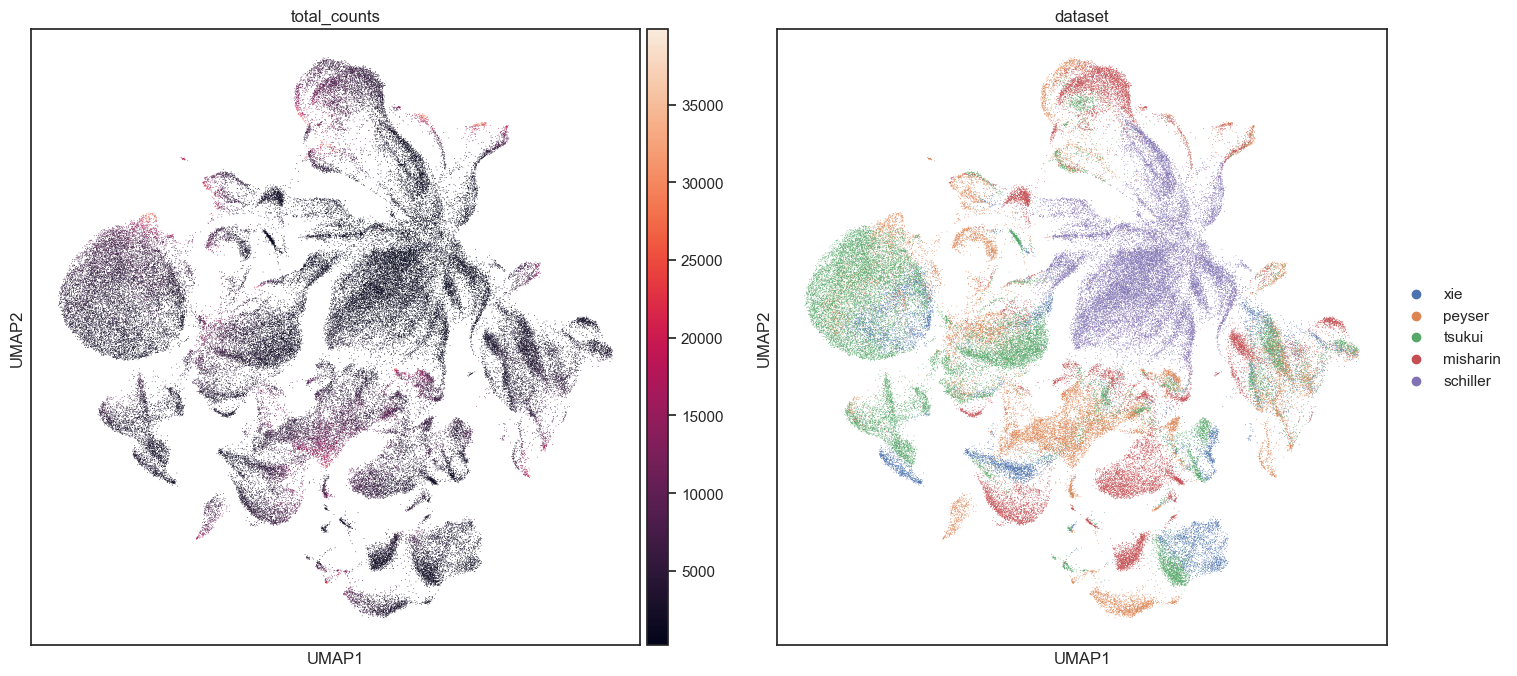

In [46]:
sc.pl.umap(adata, color=["total_counts", "dataset"])

schiller data points do not form nice clusters, like one big star shaped cluster in the middle, 
other datasets (better cluster formation): show batch effect but some clusters also have an overlap

## harmonize manual annotation names

look for typos

In [53]:
sorted(adata.obs["manual_celltype_annotation"].unique())

['AT1',
 'AT2',
 'Adventitial fibroblasts',
 'Aerocytes',
 'Alveolar fibroblasts',
 'Alveolar macrophages',
 'B-cells',
 'CD4 T-cells',
 'Classical monocytes',
 'Dendritic cells',
 'Dendritic cells Ccr7-hi',
 'Dendritic cells pDC',
 'Endothelial',
 'Epithelial',
 'Interstitial macrophages',
 'Lymphatic endothelial',
 'Myofibroblasts',
 'NA',
 'NK cells',
 'Neutrophils',
 'Non-classical monocytes',
 'Peribronchial fibroblasts',
 'SMCs',
 'T-cells',
 'Transitioning epithelial']

In [52]:
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Adventitial fibroblast"], "Adventitial fibroblasts")
adata.obs["manual_celltype_annotation"].fillna("NA", inplace=True)
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["T-Cells"], "T-cells")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Alveolar fibroblast"], "Alveolar fibroblasts")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Aerocyte"], "Aerocytes")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Dendritic cell CCR7"], "Dendritic cells Ccr7-hi")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Interstitial Macrophage"], "Interstitial macrophages")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["SMCS"], "SMCs")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["undefined"], "NA")
adata.obs["manual_celltype_annotation"] = adata.obs["manual_celltype_annotation"].replace(["Dendritic"], "Dendritic cells")


## manual annotation in UMAP

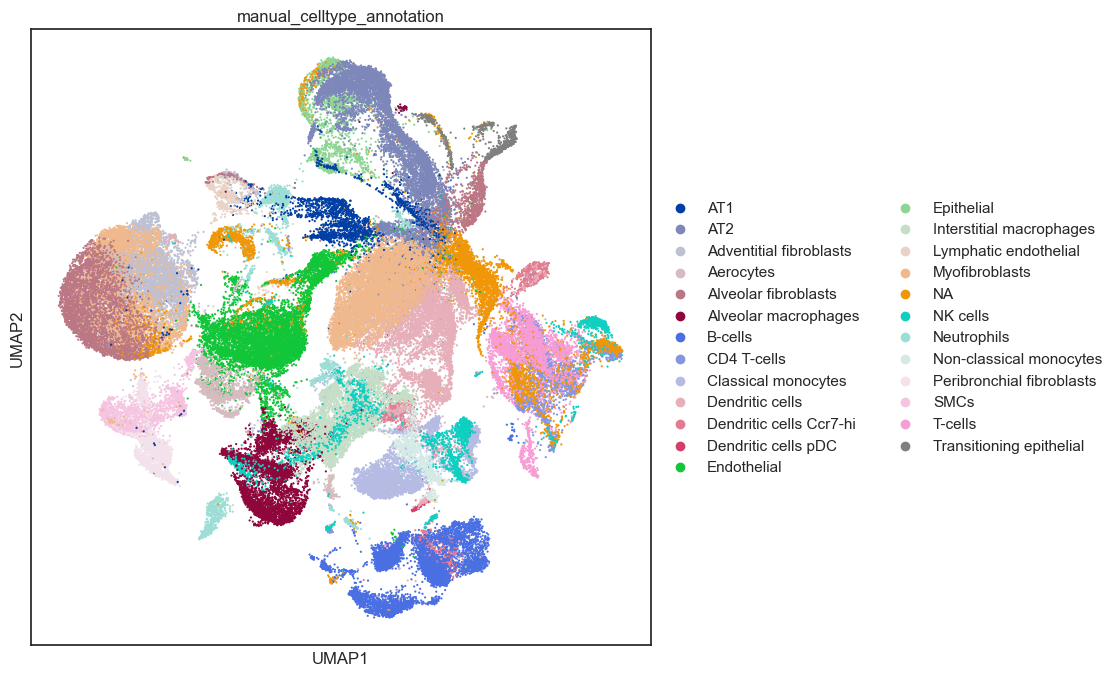

In [54]:
sc.pl.umap(adata, color=['manual_celltype_annotation'], size=10)

In [56]:
adata.write("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

In [3]:
#adata = sc.read("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")